# A* Algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

n = 5
matrix = []
block_unblock_matrix = []


In [2]:
def euclidean_distance_calc(i, j, n):
    return math.sqrt(((n - i)**2 + (n - j)**2))

def chebyshev_distance_calc(i, j, n):
    return max((n - i), (n - j))


def manhattan_distance_calc(i, j, n):
    return abs(n - i) + abs(n - j)

def compute_hofn(n, heuristic):
    
    hofn_matrix = []
    for i in range(n):
        hofn_row = []
        for j in range(n):
            if heuristic == "euclidean":
                dist = euclidean_distance_calc(i, j, n -1)
            elif heuristic == "chebyshev":
                dist = chebyshev_distance_calc(i, j, n -1)
            elif heuristic == "manhattan":
                dist = manhattan_distance_calc(i, j, n -1)
            hofn_row.append(dist)
        hofn_matrix.append(hofn_row)
    return np.array(hofn_matrix)

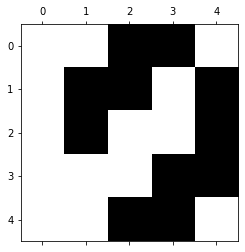

In [3]:
def populateMatrix(n,p):
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array

np_array = populateMatrix(n,0.5)
block_unblock_matrix = np.asmatrix(np_array)

plt.spy(block_unblock_matrix)

In [4]:
[(0, 0, 0), (1, 0, 1), (0, 1, 1), (0, 2, 2), (2, 0, 2), (1, 1, 2), (3, 0, 3), (2, 1, 3), (1, 2, 3), (0, 3, 3), (0, 4, 4), (1, 3, 4), (2, 2, 4), (4, 0, 4), (3, 1, 4), (4, 1, 5), (3, 2, 5), (2, 3, 5), (1, 4, 5), (2, 4, 6), (3, 3, 6), (4, 2, 6), (4, 3, 7)]

[(0, 0, 0),
 (1, 0, 1),
 (0, 1, 1),
 (0, 2, 2),
 (2, 0, 2),
 (1, 1, 2),
 (3, 0, 3),
 (2, 1, 3),
 (1, 2, 3),
 (0, 3, 3),
 (0, 4, 4),
 (1, 3, 4),
 (2, 2, 4),
 (4, 0, 4),
 (3, 1, 4),
 (4, 1, 5),
 (3, 2, 5),
 (2, 3, 5),
 (1, 4, 5),
 (2, 4, 6),
 (3, 3, 6),
 (4, 2, 6),
 (4, 3, 7)]

In [5]:
# [[1 for j in range(n)] for i in range(n)]

# hofn_matrix = list(np.array(np.arange(100).reshape((10,10))))
# # np.fliplr(hofn_matrix)

# def compute_hofn(n):
#     k = 0
#     hofn = []
#     one_row = []
#     for j in range(n):
#         one_row.append(k)
#         k += 1

#     hofn.append(one_row)

#     for i in range(n-1):
#         one_row = [x+1 for x in one_row]
#         hofn.append(one_row)

#     hofn_matrix = np.array([np.array(xi) for xi in hofn])
#     hofn_matrix = np.flip(hofn_matrix)
#     return hofn_matrix

g(n) matrix

In [6]:
def compute_gofn(n):
    k = 0
    gofn = []
    one_row = []
    for j in range(n):
        one_row.append(k)
        k += 1
    gofn.append(one_row)
    for i in range(n-1):
        one_row = [x+1 for x in one_row]
        gofn.append(one_row)

    gofn_matrix = np.array([np.array(xi) for xi in gofn])
    return gofn_matrix

In [7]:
def get_gofn(gofn_matrix, row, col):
    return gofn_matrix[row][col]

In [8]:
def get_hofn(hofn_matrix, row, col):
    return hofn_matrix[row][col]

In [9]:
# def get_children(matrix, row, column, n):
#     children = []
#     if row == 0 and column == 0:
#         children.append((row+1,column))
#         children.append((row, column+1))
#     elif row == n-1 and column == n-1:
#         print("goal node doesn't have children")
#     elif row == n-1:
#         children.append((row, column+1))
#     elif column == n-1:
#         children.append((row+1, column))
#     else:
#         children.append((row+1, column))
#         children.append((row, column+1))
#     return children 

def get_children(matrix, row, col, n, gofn):
    children = []
    left_child_row = row
    left_child_col = col + 1
    down_child_row = row + 1
    down_child_col = col
    if left_child_row <= n-1 and left_child_row >=0 and left_child_col <=n-1 and left_child_col >=0:
        children.append((left_child_row, left_child_col, gofn + 1))
    if down_child_row <= n-1 and down_child_row >=0 and down_child_col <=n-1 and down_child_col >=0:
        children.append((down_child_row, down_child_col,gofn + 1))
    return children

In [10]:
def sort(open_list, gofn_matrix, hofn_matrix):
    sort_dict = {}
    for node in open_list:
        print(node)
        row = node[0]
        col = node[1]
        gofn = gofn_matrix.item(row,col)
        hofn = hofn_matrix.item(row,col)
        print("node", node, " - gofn: ", gofn,  " - hofn: ", hofn)
#         fofn = gofn + hofn
#         print("fofn: ", fofn)
        sort_dict[node] = hofn
        sort_dict = dict(sorted(sort_dict.items(), key=lambda item: item[1]))
    return sort_dict

In [11]:
# visited_list = []
# open_list = []
# trajectory_path = []

# start = (0,0)
# goal = (n-1, n-1)

# open_list.append(start)
# # print(open_list)
# gofn_matrix = compute_gofn(n)
# # print("gofn_matrix", gofn_matrix)
# hofn_matrix = compute_hofn(n)
# # print("hofn_matrix", hofn_matrix)

# while open_list:
#     current_node = open_list.pop()
#     if current_node == (n-1,n-1):
#         print("goal node reached. The path is:", trajectory_path)
#         break
#     print("current_node:", current_node)
#     if block_unblock_matrix.item(current_node) == 0:
#         visited_list.append(current_node)
#         trajectory_path.append(current_node)
#         children = get_children(block_unblock_matrix, current_node[0], current_node[1], n)
#         print("children", children)
#         open_list.extend(children)
#         sort_dict = sort(open_list, gofn_matrix, hofn_matrix)
#         print("sort_dict", sort_dict)
#         open_list = list(sort_dict.keys())
#         print("updated open list: ", open_list)
#         print("trajectory_path: ", trajectory_path)
#         print("---------------------\n")
#     else:
#         if open_list == []:
#             print("There is no path available to goal Node")
#             break
#         else:
#             print("path blocked from", current_node, "backtracking and attempting to Traversing from a different node")
#             if current_node in trajectory_path:
#                 trajectory_path.remove(current_node)

In [12]:
visited_list = []
open_list = []
trajectory_path = []

start = (0, 0, 0)
goal = (n-1, n-1)

open_list.append(start)
# print(open_list)
gofn_matrix = compute_gofn(n)
# print("gofn_matrix", gofn_matrix)
hofn_matrix = compute_hofn(n, "manhattan")
# print("hofn_matrix", hofn_matrix)


while open_list:
    current_node = open_list.pop()
    print("current_node:", current_node)
    if block_unblock_matrix.item(current_node[0], current_node[1]) == 0:
        if current_node[0] == n-1 and current_node[1] == n-1:
            print("Reached Goal!!!!!!!!!!!!!!!!!!!!!!!")
            break
        visited_list.append(current_node)
        trajectory_path.append(current_node)
        children = get_children(block_unblock_matrix, current_node[0], current_node[1], n, current_node[2])
        print("children", children)
        open_list.extend(children)
        sort_dict = sort(open_list, gofn_matrix, hofn_matrix)
        print("sort_dict", sort_dict)
        open_list = list(sort_dict.keys())
        print("updated open list: ", open_list)
        print("trajectory_path: ", trajectory_path)
        print("---------------------\n")
    else:
        if open_list == []:
            print("There is no path available to goal Node")
            break
        else:
            print("path blocked from", current_node, "backtracking and attempting to Traversing from a different node")
            if current_node in trajectory_path:
                trajectory_path.remove(current_node)

current_node: (0, 0, 0)
children [(0, 1, 1), (1, 0, 1)]
(0, 1, 1)
node (0, 1, 1)  - gofn:  1  - hofn:  7
(1, 0, 1)
node (1, 0, 1)  - gofn:  1  - hofn:  7
sort_dict {(0, 1, 1): 7, (1, 0, 1): 7}
updated open list:  [(0, 1, 1), (1, 0, 1)]
trajectory_path:  [(0, 0, 0)]
---------------------

current_node: (1, 0, 1)
children [(1, 1, 2), (2, 0, 2)]
(0, 1, 1)
node (0, 1, 1)  - gofn:  1  - hofn:  7
(1, 1, 2)
node (1, 1, 2)  - gofn:  2  - hofn:  6
(2, 0, 2)
node (2, 0, 2)  - gofn:  2  - hofn:  6
sort_dict {(1, 1, 2): 6, (2, 0, 2): 6, (0, 1, 1): 7}
updated open list:  [(1, 1, 2), (2, 0, 2), (0, 1, 1)]
trajectory_path:  [(0, 0, 0), (1, 0, 1)]
---------------------

current_node: (0, 1, 1)
children [(0, 2, 2), (1, 1, 2)]
(1, 1, 2)
node (1, 1, 2)  - gofn:  2  - hofn:  6
(2, 0, 2)
node (2, 0, 2)  - gofn:  2  - hofn:  6
(0, 2, 2)
node (0, 2, 2)  - gofn:  2  - hofn:  6
(1, 1, 2)
node (1, 1, 2)  - gofn:  2  - hofn:  6
sort_dict {(1, 1, 2): 6, (2, 0, 2): 6, (0, 2, 2): 6}
updated open list:  [(1, 1, 2), 

In [13]:
np_array = populateMatrix(n,0)
block_unblock_matrix = np.asmatrix(np_array)

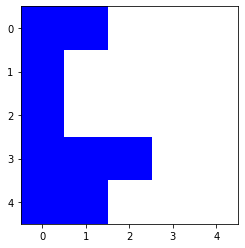

In [14]:
np_array
for path in trajectory_path:
    
    block_unblock_matrix[path[:2]] = 1

colormap = colors.ListedColormap(["white","blue"])
plt.imshow(block_unblock_matrix, cmap=colormap)
plt.show()